# Standardized data

In [ ]:
from sklearn import preprocessing
import numpy as np
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])
print(preprocessing.scale(X))

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array([
    [0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
])
ss = StandardScaler()
X = ss.fit_transform(X)
print(X)

# download the nltk library

In [ ]:
!conda install -c anaconda nltk -y

In [ ]:
# conda install -c anaconda nltk
import nltk

nltk.download()

# One-hot encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer()
X = [
    {'city': 'New York'},
    {'city': 'San Francisco'},
    {'city': 'Chapel Hill'}
]
print(onehot_encoder.fit_transform(X).toarray())

# Bag of Words Model

In [ ]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game'
]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

In [ ]:
corpus.append('I ate a sandwich')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
X = np.asarray(vectorizer.fit_transform(corpus).todense())
print('Distance between 1st and 2nd documents:', euclidean_distances(X[0].reshape(1, -1), X[1].reshape(1, -1)))
print('Distance between 1st and 3rd documents:', euclidean_distances(X[0].reshape(1, -1), X[2].reshape(1, -1)))
print('Distance between 2nd and 3rd documents:', euclidean_distances(X[1].reshape(1, -1), X[2].reshape(1, -1)))

# Stop words

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense()) # "in", "the" was disappear
print(vectorizer.vocabulary_)

In [ ]:
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

# Stemming and Lemmatization

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('gathering', 'v'))
print(lemmatizer.lemmatize('gathering', 'n'))

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
print(stemmer.stem('gathering'))

In [ ]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

wordnet_tags = ['n', 'v']
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
stemmer = PorterStemmer()
print('Stemmed:', [[stemmer.stem(token) for token in word_tokenize(document)] for document in corpus])


def lemmatize(token, tag):
    if tag[0].lower() in ['n', 'v']:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

lemmatizer = WordNetLemmatizer()
tagged_corpus = [pos_tag(word_tokenize(document)) for document in corpus]
print('Lemmatized:', [[lemmatize(token, tag) for token, tag in document] for document in tagged_corpus])

# pos_tag
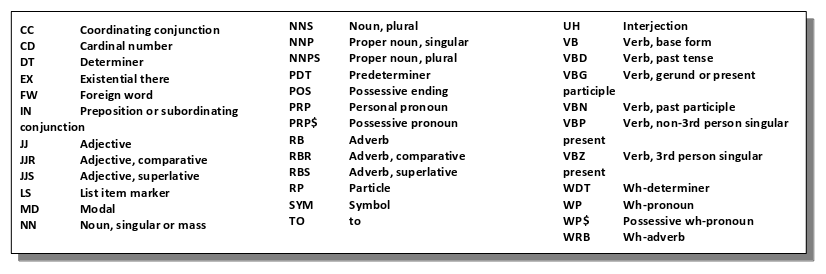

In [ ]:
tagged_corpus

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

counts = [[3, 0, 1],
           [2, 0, 0],
           [3, 0, 0],
           [4, 0, 0],
           [3, 2, 0],
           [3, 0, 2]]

tfidf = transformer.fit_transform(counts)
tfidf.toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'The dog ate a sandwich and I ate a sandwich',
    'The wizard transfigured a sandwich'
]

vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print(vectorizer.vocabulary_)

# the term "sandwich" have been penalized
vectorizer = TfidfVectorizer(smooth_idf=False, stop_words='english')
print(vectorizer.fit_transform(corpus).todense())